In [ ]:
import numpy as np, json, \
    matplotlib.pyplot as plt

from dataclasses import dataclass

from detector.detect import Anomaly
from detector.model import DataPoint

In [15]:
@dataclass
class Artifact:

    classification: str
    data: np.ndarray

In [ ]:
with open('data_store/examples.json', 'r') as e:
    rd = json.load(e)
    data = [Artifact(dp['classification'], np.array(dp['anom']['data'])) for dp in rd]

In [75]:
NUM_CHANNELS = 5
NUM_SAMPLES_PER_CLASS = 5
NUM_CLASSES = 9

In [76]:
all_classifications = list([dp.classification for dp in data])

In [77]:
flatten_data = sum([[{
        'class': dp.classification,
        'data': dp.data[:, i],
        'index': i
    } for i in range(NUM_SAMPLES_PER_CLASS)] for dp in data], [])

flatten_data = sorted(flatten_data, key = lambda x: all_classifications.index(x['class']) * NUM_SAMPLES_PER_CLASS + x['index'])


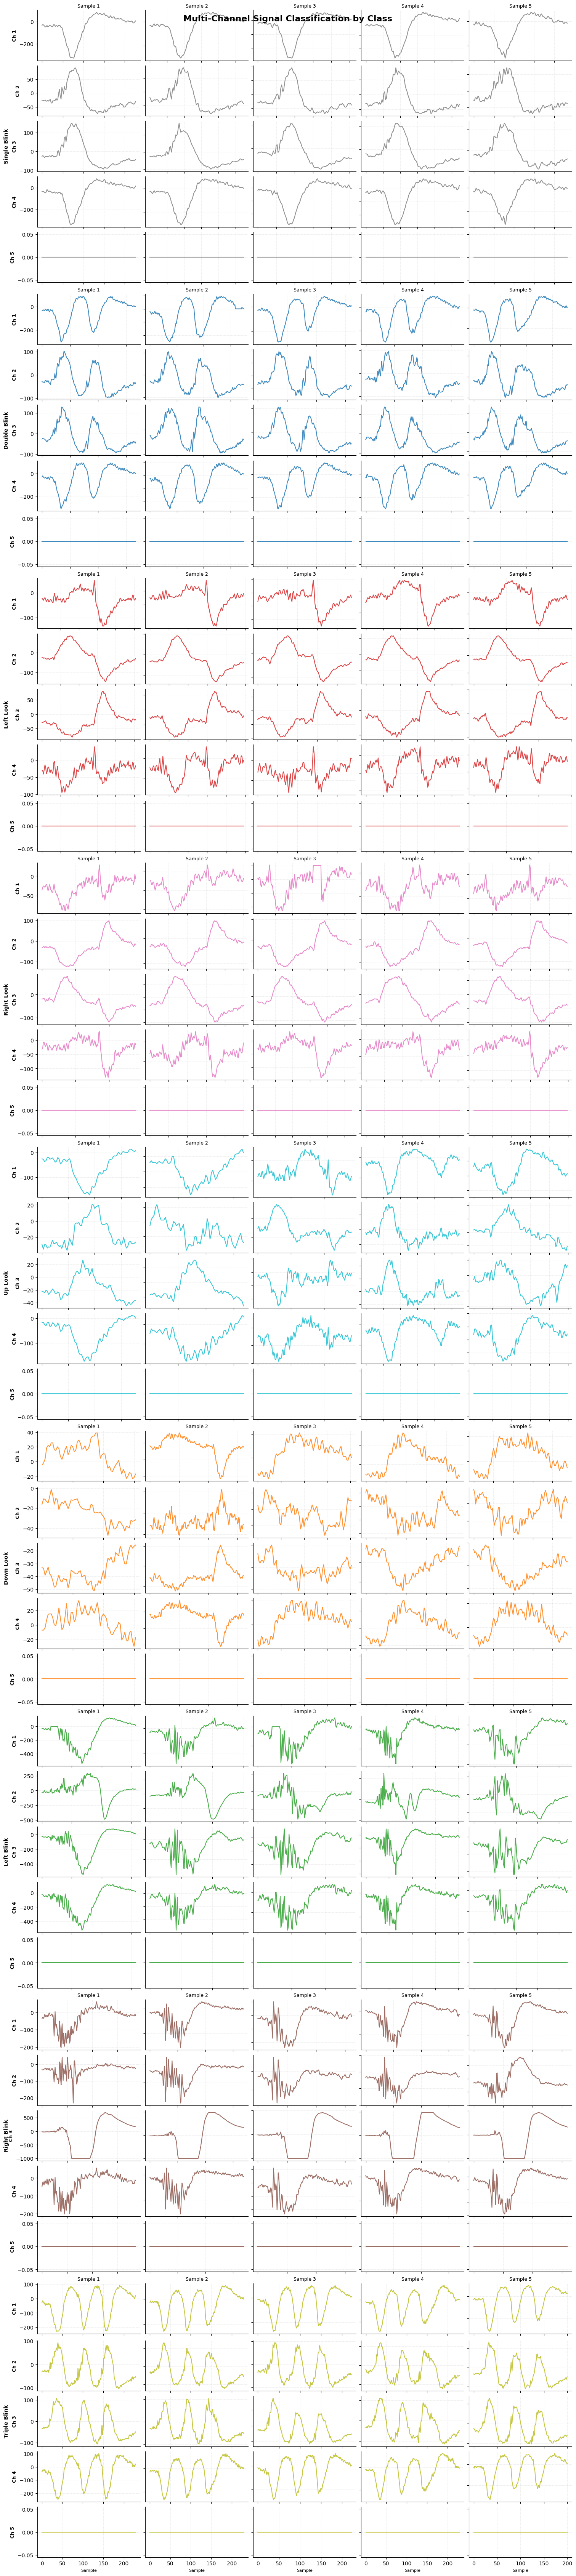

In [78]:
fig, axs = plt.subplots(
    NUM_CHANNELS * NUM_CLASSES,
    NUM_SAMPLES_PER_CLASS, 
    figsize=(NUM_SAMPLES_PER_CLASS * 3, NUM_CHANNELS * NUM_CLASSES * 1.5),
    constrained_layout=True
)

axs = axs.flatten()

# Define color palette for different classifications
colors = plt.cm.tab10(np.linspace(0, 1, NUM_CLASSES))

# Create a mapping from classification strings to color indices
unique_classes = sorted(set(dp['class'] for dp in flatten_data))
class_to_color_idx = {cls: idx for idx, cls in enumerate(unique_classes)}

for i, (dp, ax) in enumerate(zip(flatten_data, axs)):
    classification = dp['class']
    channel_idx = dp['index']
    
    # Get color index from classification string
    color_idx = class_to_color_idx[classification]
    
    # Plot with styled line
    ax.plot(
        dp['data'],
        color=colors[color_idx],
        linewidth=1.5,
        alpha=0.85
    )
    
    # Clean up axes
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.grid(True, alpha=0.3, linestyle='--', linewidth=0.5)
    
    # Calculate which row/column we're in
    row_idx = i // NUM_SAMPLES_PER_CLASS
    col_idx = i % NUM_SAMPLES_PER_CLASS
    class_group = row_idx // NUM_CHANNELS
    channel_in_class = row_idx % NUM_CHANNELS
    
    # Add labels for leftmost column
    if col_idx == 0:
        ax.set_ylabel(f'Ch {channel_idx + 1}', fontweight='bold', fontsize=9)
    
    # Add labels for bottom row
    if row_idx == (NUM_CHANNELS * NUM_CLASSES) - 1:
        ax.set_xlabel('Sample', fontsize=8)
    
    # Add title for top row of each class group
    if channel_in_class == 0 and col_idx < NUM_SAMPLES_PER_CLASS:
        ax.set_title(f'Sample {col_idx + 1}', fontsize=9, pad=5)
    
    # Add class label on the left side
    if col_idx == 0 and channel_in_class == NUM_CHANNELS // 2:
        ax.text(-0.3, 0.5, f'{classification}', 
                transform=ax.transAxes, rotation=90, 
                fontweight='bold', fontsize=10, va='center', ha='center')
    
    # Remove tick labels for cleaner look (except edges)
    if col_idx > 0:
        ax.set_yticklabels([])
    if row_idx < (NUM_CHANNELS * NUM_CLASSES) - 1:
        ax.set_xticklabels([])

# Hide unused axes
for i in range(len(flatten_data), len(axs)):
    axs[i].axis('off')

plt.suptitle('Multi-Channel Signal Classification by Class', 
             fontsize=16, fontweight='bold', y=0.995)
plt.show()

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

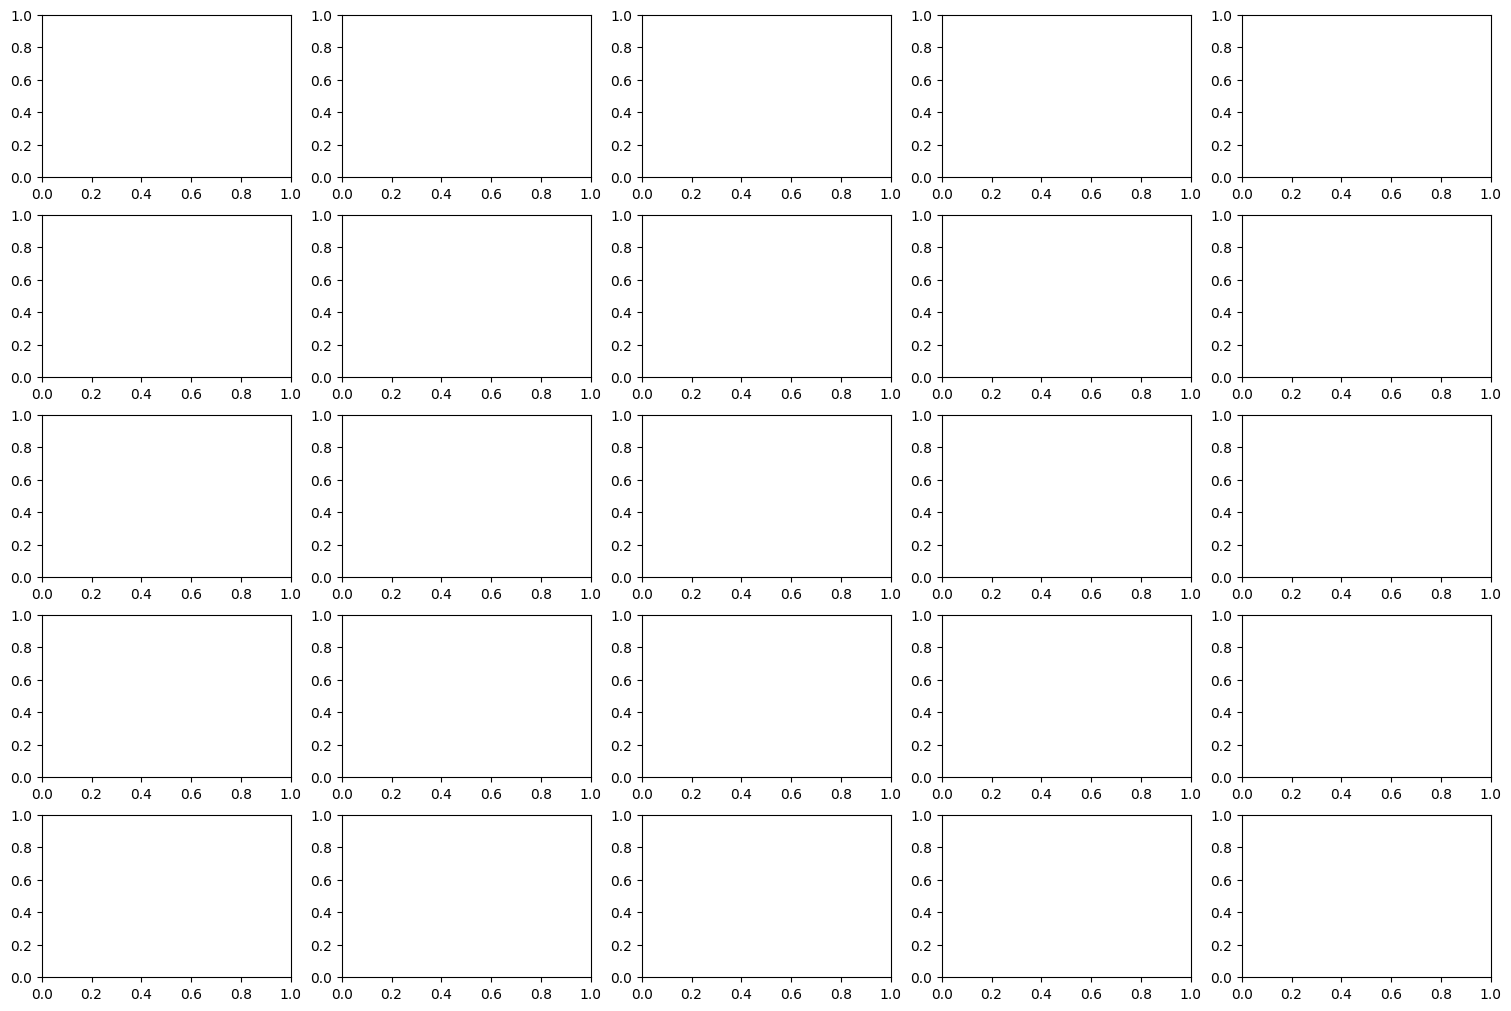

In [ ]:
NUM_CHANNELS = 5
NUM_EXAMPLES_PER_CLASS = 5

# Calculate number of classes from data
NUM_CLASSES = len(data) // NUM_EXAMPLES_PER_CLASS

fig, axs = plt.subplots(
    NUM_CHANNELS,
    NUM_EXAMPLES_PER_CLASS, 
    figsize=(NUM_EXAMPLES_PER_CLASS * 3, NUM_CHANNELS * 2),
    constrained_layout=True
)

# Handle case where we only have 1 row or 1 column
if NUM_CHANNELS == 1:
    axs = axs.reshape(1, -1)
elif NUM_EXAMPLES_PER_CLASS == 1:
    axs = axs.reshape(-1, 1)

# Define color palette for different classifications
colors = plt.cm.Set2(np.linspace(0, 1, NUM_CLASSES))

for ch_idx in range(NUM_CHANNELS):
    for ex_idx in range(NUM_EXAMPLES_PER_CLASS):
        ax = axs[ch_idx, ex_idx]
        
        # Calculate which data point this corresponds to
        dp_idx = ex_idx  # Assumes data is ordered: 5 examples, then repeat for next class
        
        if dp_idx < len(data):
            classification = data[dp_idx].classification
            
            # Plot with styled line
            ax.plot(
                data[dp_idx].data[:, ch_idx],
                color=colors[classification],
                linewidth=1.5,
                alpha=0.8
            )
            
            # Clean up axes
            ax.spines['top'].set_visible(False)
            ax.spines['right'].set_visible(False)
            ax.grid(True, alpha=0.3, linestyle='--')
            
            # Add labels for leftmost column
            if ex_idx == 0:
                ax.set_ylabel(f'Sensor {ch_idx + 1}', fontweight='bold')
            
            # Add labels for bottom row
            if ch_idx == NUM_CHANNELS - 1:
                ax.set_xlabel('Sample', fontsize=9)
            
            # Add title for top row with classification
            if ch_idx == 0:
                ax.set_title(f'DP{ex_idx + 1} (Class {classification})', fontsize=10, pad=8)
        else:
            ax.axis('off')

plt.suptitle('Multi-Sensor Data by Example', fontsize=14, fontweight='bold')
plt.show()